In [1]:
# Grupo 1 - notebook_titanicsurvivalprediction

import numpy as np # Manipulação de matrizes
import pandas as pd # Criação e manipulação de dataset
from pandas import *
import matplotlib.pyplot as plt # Plotagem de dados
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns # Plotagem e visualização dos dados
from tabulate import tabulate
from scipy.stats import chi2_contingency
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
# Criando dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
# Visualização inicial do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Número de linhas do Data Frame
df.shape

(891, 12)

In [5]:
# Colunas presentes no Data Frame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Informações sobre o conjunto de dados
print("\nInformações sobre o conjunto de dados:")
print(df.info())


Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Avaliando a existência de dados nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Avaliando valores nulos
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# Calculando a porcentagem de valores não nulos em cada coluna
total_rows = len(df)
percentages = (df.count() / total_rows) * 100

# Mostrando os valores em porcentagem
print("\nPorcentagem de valores não nulos em cada coluna:")
print(percentages) 


Porcentagem de valores não nulos em cada coluna:
PassengerId    100.000000
Survived       100.000000
Pclass         100.000000
Name           100.000000
Sex            100.000000
Age             80.134680
SibSp          100.000000
Parch          100.000000
Ticket         100.000000
Fare           100.000000
Cabin           22.895623
Embarked        99.775533
dtype: float64


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

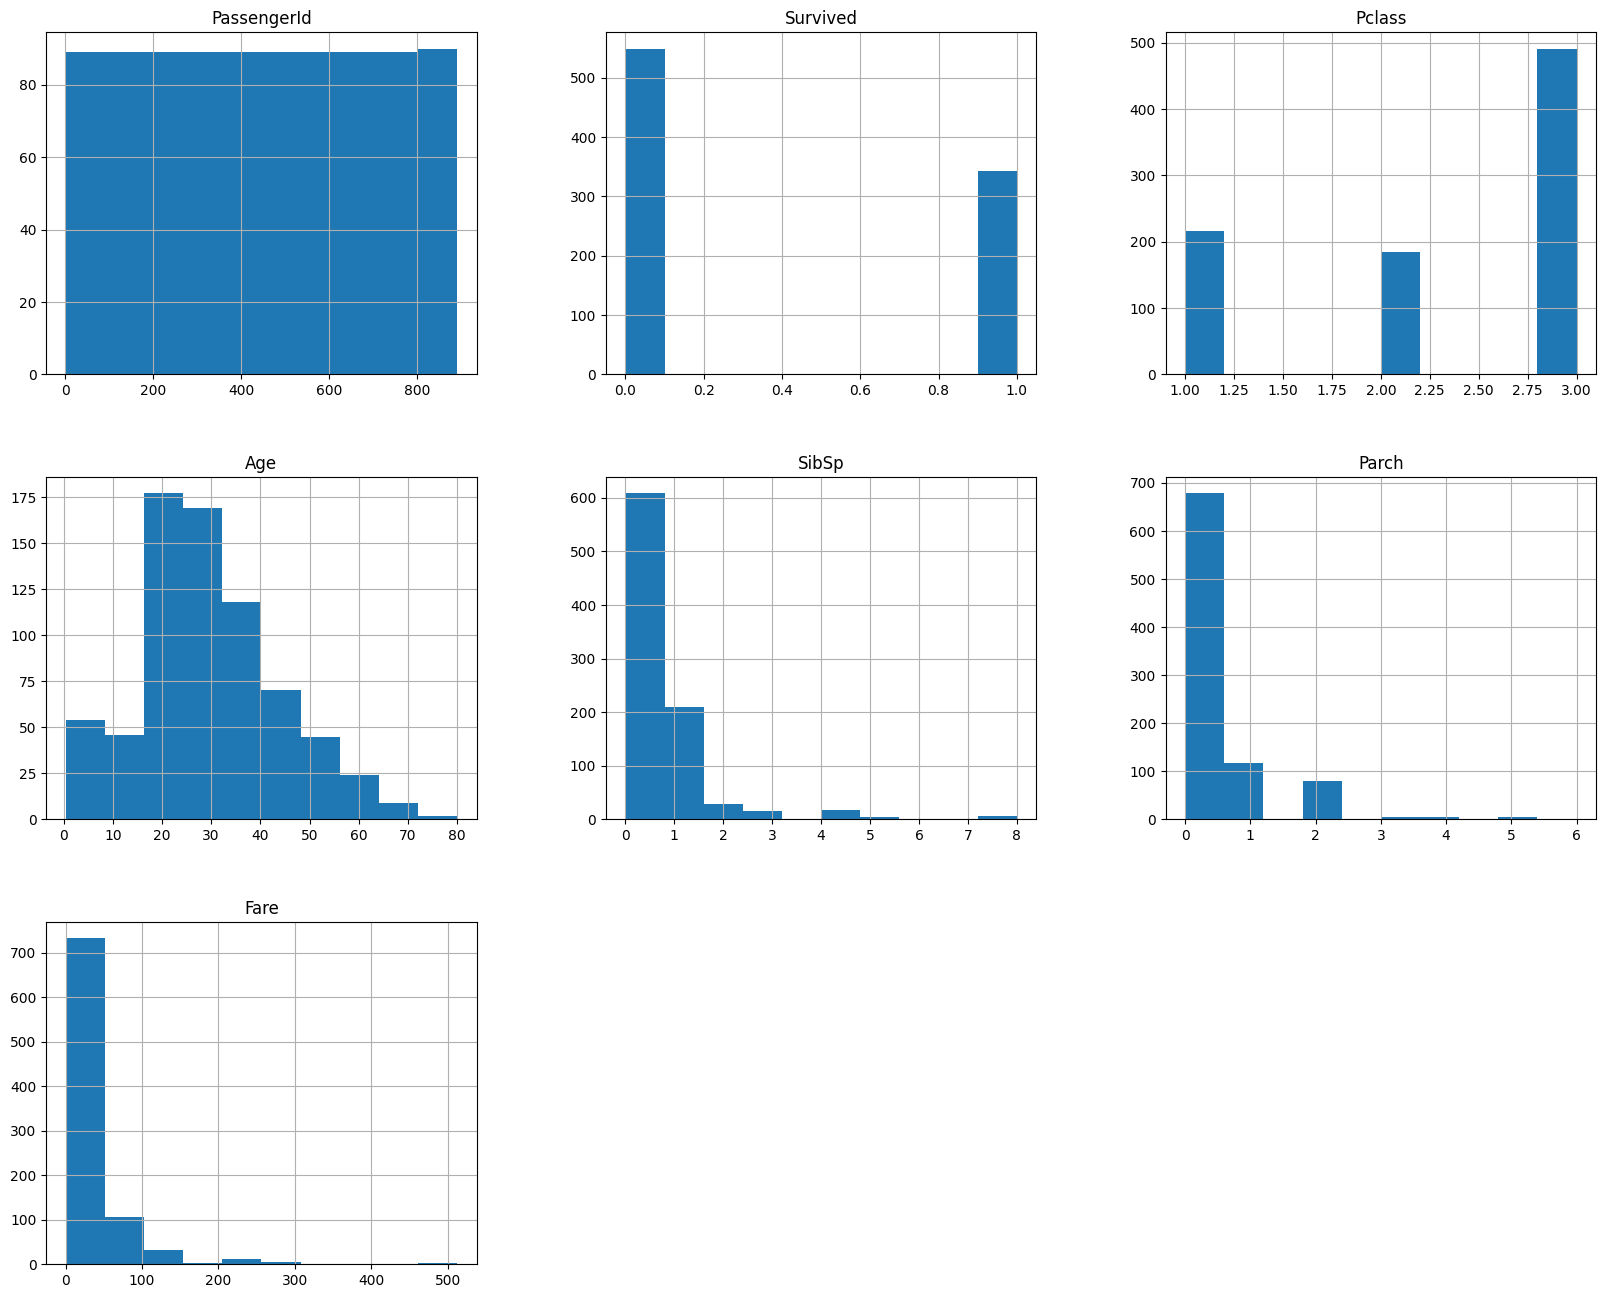

In [10]:
#histograma das variáveis numéricas
df.hist(figsize=(20,16))

In [11]:
#definindo os dados que aparecerão no gráfico

labels = ['Não Sobreviventes', "Sobreviventes"] 

contagem = pd.cut(x=df.Survived, bins=2,labels= labels, include_lowest=True).value_counts() #nº de sobreviventes

taxa_de_sobreviventes = (pd.value_counts(pd.cut(x=df.Survived, bins=2,labels= labels, 
                                                include_lowest=True),normalize=True) * 100).round(1) #taxa de Sobreviventes
quant_sobrevi = pd.DataFrame({"Contagem":contagem, 
                              'Taxa de Sobrevivência(%)':taxa_de_sobreviventes}) #criando um DataFrame para facilitar a visualização dos dados
                              
quant_sobrevi

/tmp/ipykernel_18/801052104.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  taxa_de_sobreviventes = (pd.value_counts(pd.cut(x=df.Survived, bins=2,labels= labels,


,Contagem,Taxa de Sobrevivência(%)
Survived,,
Não Sobreviventes,549,61.6
Sobreviventes,342,38.4


Text(0.5, 1.0, 'Taxa de Sobreviventes do Titanic')

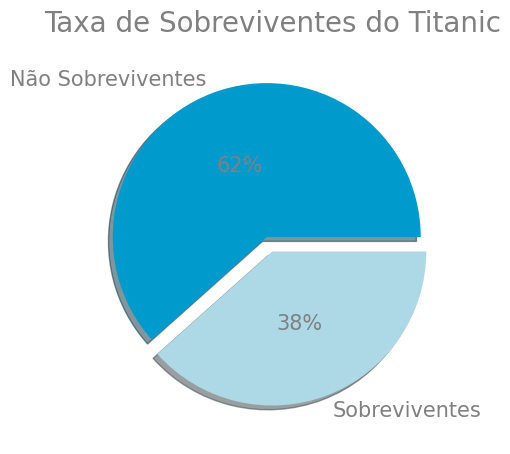

In [12]:
plt.figure(figsize=(7, 5))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor']= 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['font.size']=15

cores= ['#009ACD', '#ADD8E6']
percentages = list(quant_sobrevi['Taxa de Sobrevivência(%)'])
explode=(0.1,0)

plt.pie(percentages, explode=explode, 
       labels=labels,
       colors = cores,
       autopct='%1.0f%%',
       shadow=True, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
plt.title("Taxa de Sobreviventes do Titanic", fontsize=20, pad=20)

In [13]:
#Quantidade de pessoas por sexo
#quant_sex=pd.DataFrame(df['Sex'].value_counts())
#quant_sex['Sex em %'] = (quant_sex/(quant_sex.Sex.sum()) *100).round(2)
#quant_sex['Nº Sobreviventes por Sexo']= df.groupby('Sex')['Survived'].sum()
#quant_sex['Taxa de Sobreviventes por Sexo em %'] = (quant_sex['Nº Sobreviventes por Sexo']/quant_sex['Sex'] *100).round(2)
#quant_sex

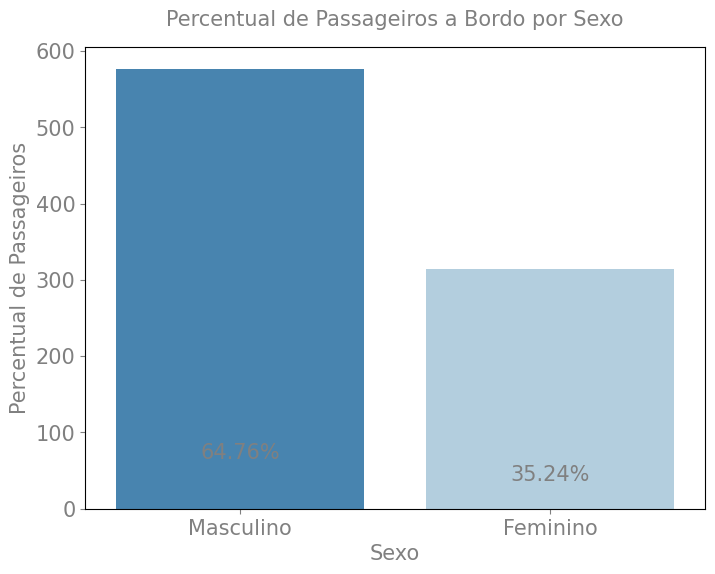

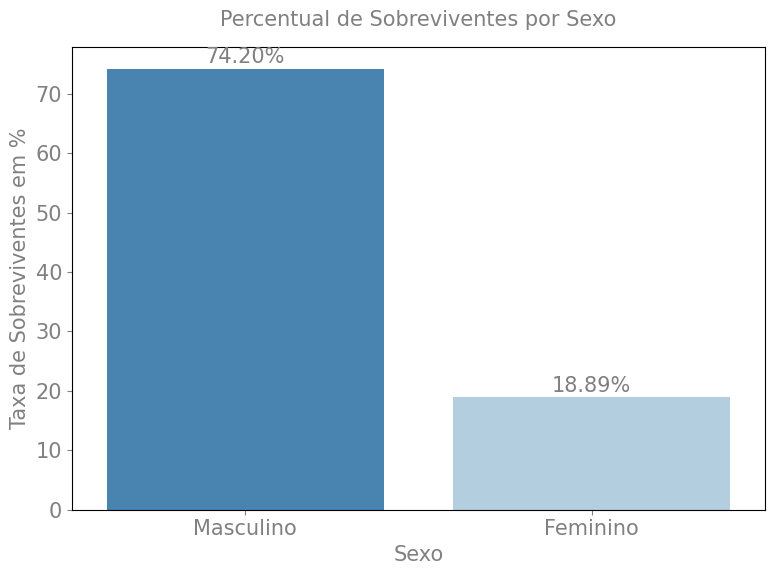

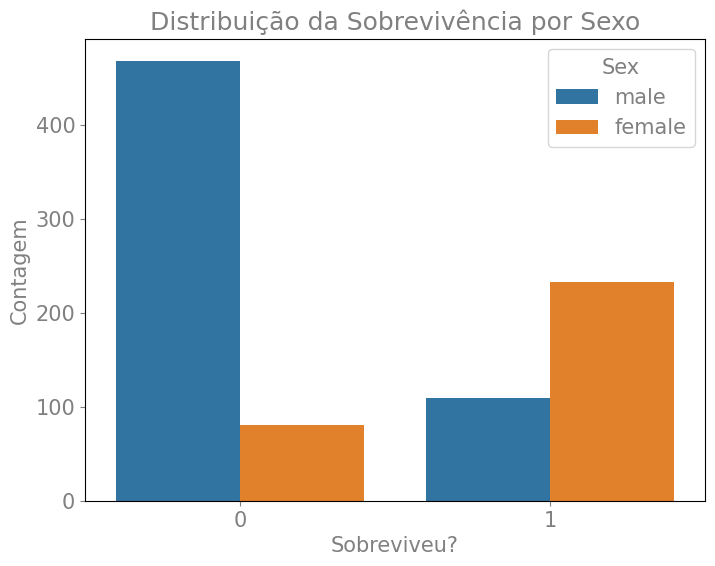

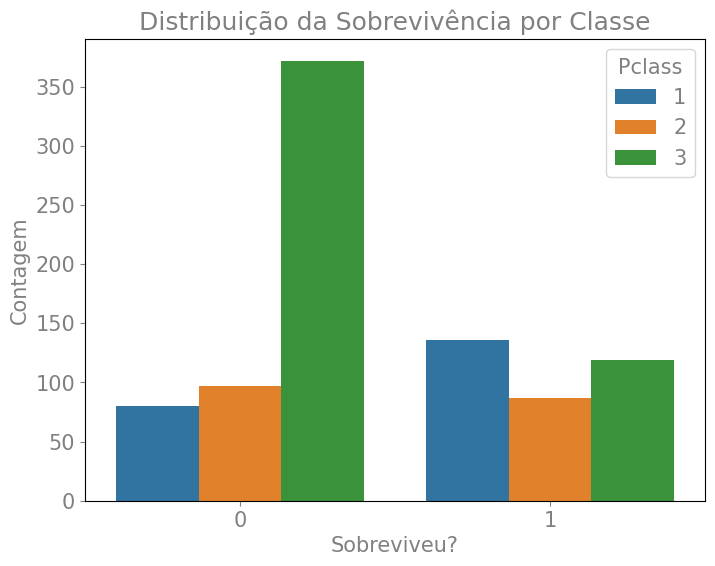

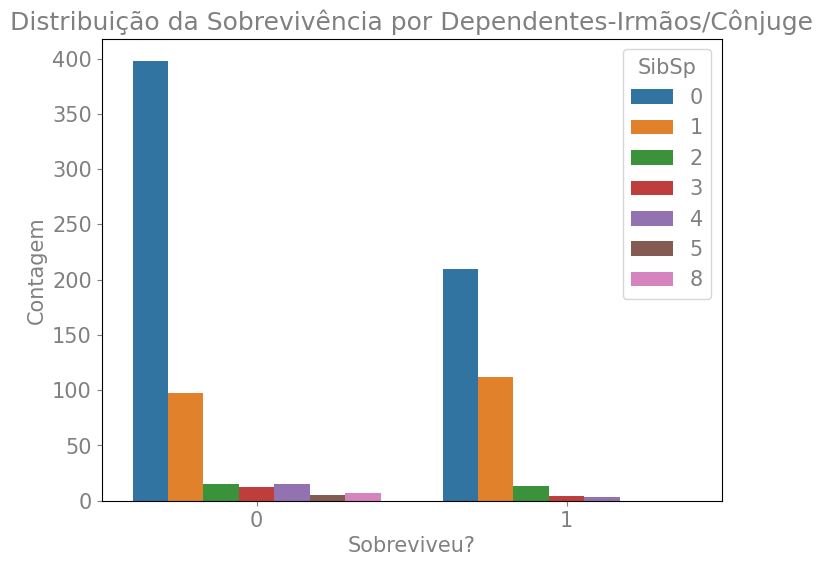

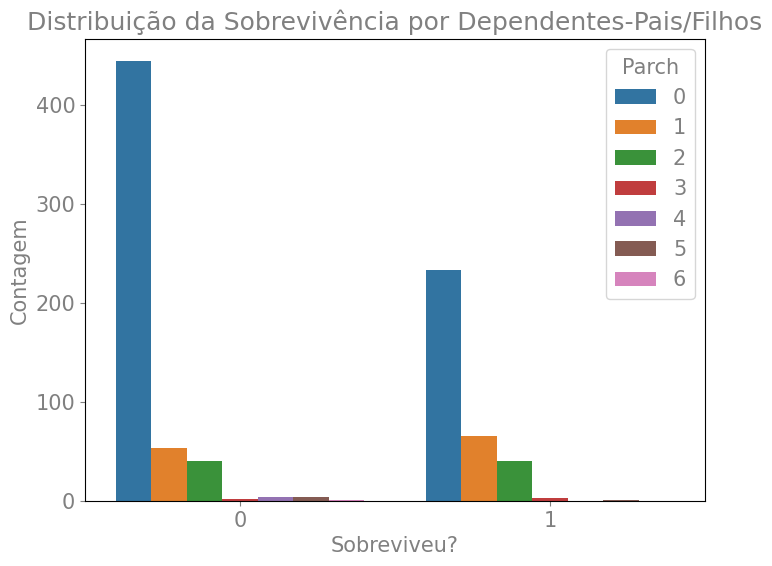

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


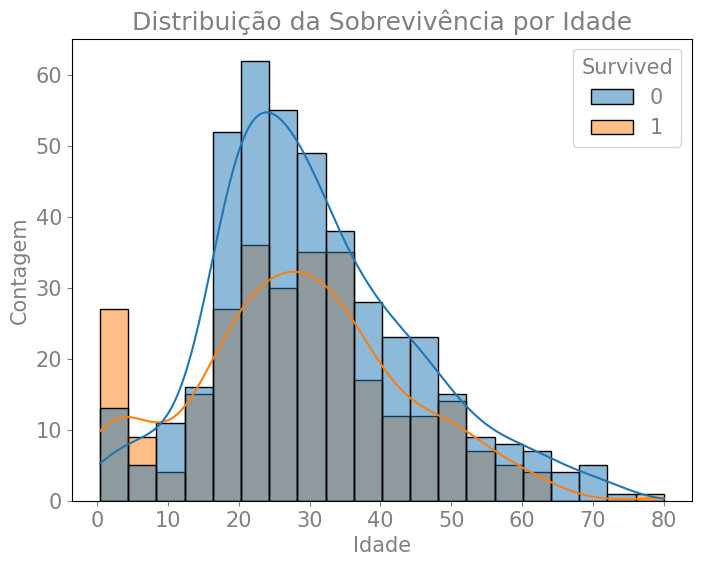

In [14]:
# Remover avisos
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# Calcular o percentual de Passageiros a Bordo por Sexo
percentual_por_sexo = df['Sex'].value_counts(normalize=True) * 100
# Gráfico: Percentual de Passageiros a Bordo por Sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', palette='Blues_r')
plt.title('Percentual de Passageiros a Bordo por Sexo', fontsize=15, pad=15)
plt.xlabel('Sexo', fontsize=15)
plt.ylabel('Percentual de Passageiros', fontsize=15)
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'])  # Definindo os rótulos do eixo x
# Adicionar texto com os percentuais no gráfico
for i, percentual in enumerate(percentual_por_sexo):
    plt.text(i, percentual + 1, f'{percentual:.2f}%', ha='center')
plt.show()

# Calcular o percentual de Sobreviventes por Sexo
percentual_por_sexo = df.groupby('Sex')['Survived'].mean() * 100
# Criar um DataFrame com os dados
quant_sex = pd.DataFrame({'Sexo': percentual_por_sexo.index, 'Taxa de Sobreviventes por Sexo em %': percentual_por_sexo.values})
# Plotar o gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sexo', y='Taxa de Sobreviventes por Sexo em %', data=quant_sex, palette='Blues_r')
ax.set_title("Percentual de Sobreviventes por Sexo", fontsize=15, pad=15)
ax.set_xlabel('Sexo', fontsize=15)
ax.set_ylabel('Taxa de Sobreviventes em %', fontsize=15)
ax.set_xticklabels(labels=['Masculino', 'Feminino'])
plt.tight_layout()
# Adicionar texto com os percentuais no gráfico
for i, percentual in enumerate(percentual_por_sexo):
    plt.text(i, percentual + 1, f'{percentual:.2f}%', ha='center')
plt.show()

# Gráfico: Distribuição da sobrevivência por sexo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Distribuição da Sobrevivência por Sexo')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por classe
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Distribuição da Sobrevivência por Classe')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por dependentes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='SibSp')
plt.title('Distribuição da Sobrevivência por Dependentes-Irmãos/Cônjuge')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por dependentes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Parch')
plt.title('Distribuição da Sobrevivência por Dependentes-Pais/Filhos')
plt.xlabel('Sobreviveu?')
plt.ylabel('Contagem')
plt.show()

# Gráfico: Distribuição da sobrevivência por idade
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribuição da Sobrevivência por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()


In [15]:
# Calcula as estatísticas descritivas
statistics = df.describe(include='all')

# Imprimir as estatísticas descritivas em uma tabela formatada
print("Estatísticas Descritivas:")
print(tabulate(statistics, headers='keys', tablefmt='fancy_grid'))

Estatísticas Descritivas:
╒════════╤═══════════════╤════════════╤════════════╤═════════════════════════╤═══════╤══════════╤════════════╤════════════╤══════════╤══════════╤═════════╤════════════╕
│        │   PassengerId │   Survived │     Pclass │ Name                    │ Sex   │      Age │      SibSp │      Parch │   Ticket │     Fare │ Cabin   │ Embarked   │
╞════════╪═══════════════╪════════════╪════════════╪═════════════════════════╪═══════╪══════════╪════════════╪════════════╪══════════╪══════════╪═════════╪════════════╡
│ count  │       891     │ 891        │ 891        │ 891                     │ 891   │ 714      │ 891        │ 891        │      891 │ 891      │ 204     │ 889        │
├────────┼───────────────┼────────────┼────────────┼─────────────────────────┼───────┼──────────┼────────────┼────────────┼──────────┼──────────┼─────────┼────────────┤
│ unique │       nan     │ nan        │ nan        │ 891                     │ 2     │ nan      │ nan        │ nan        │      

In [16]:
# Calcular as taxas de sobrevivência
survival_rate_Sex = df.groupby('Sex')['Survived'].mean()
survival_rate_Pclass = df.groupby('Pclass')['Survived'].mean()
survival_rate_Age = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 50, 100]))['Survived'].mean()
survival_rate_SibSp = df.groupby('SibSp')['Survived'].mean()
survival_rate_Parch = df.groupby('Parch')['Survived'].mean()

# Memória de Cálculo
print("Taxa de Sobrevivência por Sexo:")
print(tabulate(survival_rate_Sex.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Classe Socioeconômica:")
print(tabulate(survival_rate_Pclass.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Faixa Etária:")
print(tabulate(survival_rate_Age.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Dependentes-Irmãos/Cônjuge:")
print(tabulate(survival_rate_SibSp.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("Taxa de Sobrevivência por Dependentes-Pais/Filhos:")
print(tabulate(survival_rate_Parch.reset_index(), headers='keys', tablefmt='fancy_grid'))

# Fórmulas
print("\nFórmulas Utilizadas:")
print("Taxa de Sobrevivência por Sexo: (Número de Sobreviventes do Sexo / Número Total de Passageiros do Sexo)")
print("Taxa de Sobrevivência por Classe Socioeconômica: (Número de Sobreviventes da Classe / Número Total de Passageiros da Classe)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes na Faixa Etária / Número Total de Passageiros na Faixa Etária)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes de Dependentes-Irmãos/Cônjuge / Número Total de Passageiros Dependentes-Irmãos/Cônjuge)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes de Dependentes-Pais/Filhos / Número Total de Passageiros Dependentes-Pais/Filhos)")


Taxa de Sobrevivência por Sexo:
╒════╤════════╤════════════╕
│    │ Sex    │   Survived │
╞════╪════════╪════════════╡
│  0 │ female │   0.742038 │
├────┼────────┼────────────┤
│  1 │ male   │   0.188908 │
╘════╧════════╧════════════╛

Taxa de Sobrevivência por Classe Socioeconômica:
╒════╤══════════╤════════════╕
│    │   Pclass │   Survived │
╞════╪══════════╪════════════╡
│  0 │        1 │   0.62963  │
├────┼──────────┼────────────┤
│  1 │        2 │   0.472826 │
├────┼──────────┼────────────┤
│  2 │        3 │   0.242363 │
╘════╧══════════╧════════════╛

Taxa de Sobrevivência por Faixa Etária:
╒════╤═══════════╤════════════╕
│    │ Age       │   Survived │
╞════╪═══════════╪════════════╡
│  0 │ (0, 18]   │   0.503597 │
├────┼───────────┼────────────┤
│  1 │ (18, 30]  │   0.355556 │
├────┼───────────┼────────────┤
│  2 │ (30, 50]  │   0.423237 │
├────┼───────────┼────────────┤
│  3 │ (50, 100] │   0.34375  │
╘════╧═══════════╧════════════╛

Taxa de Sobrevivência por Dependentes-Irmã

/tmp/ipykernel_18/160657806.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_Age = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 50, 100]))['Survived'].mean()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 3000x1500 with 0 Axes>

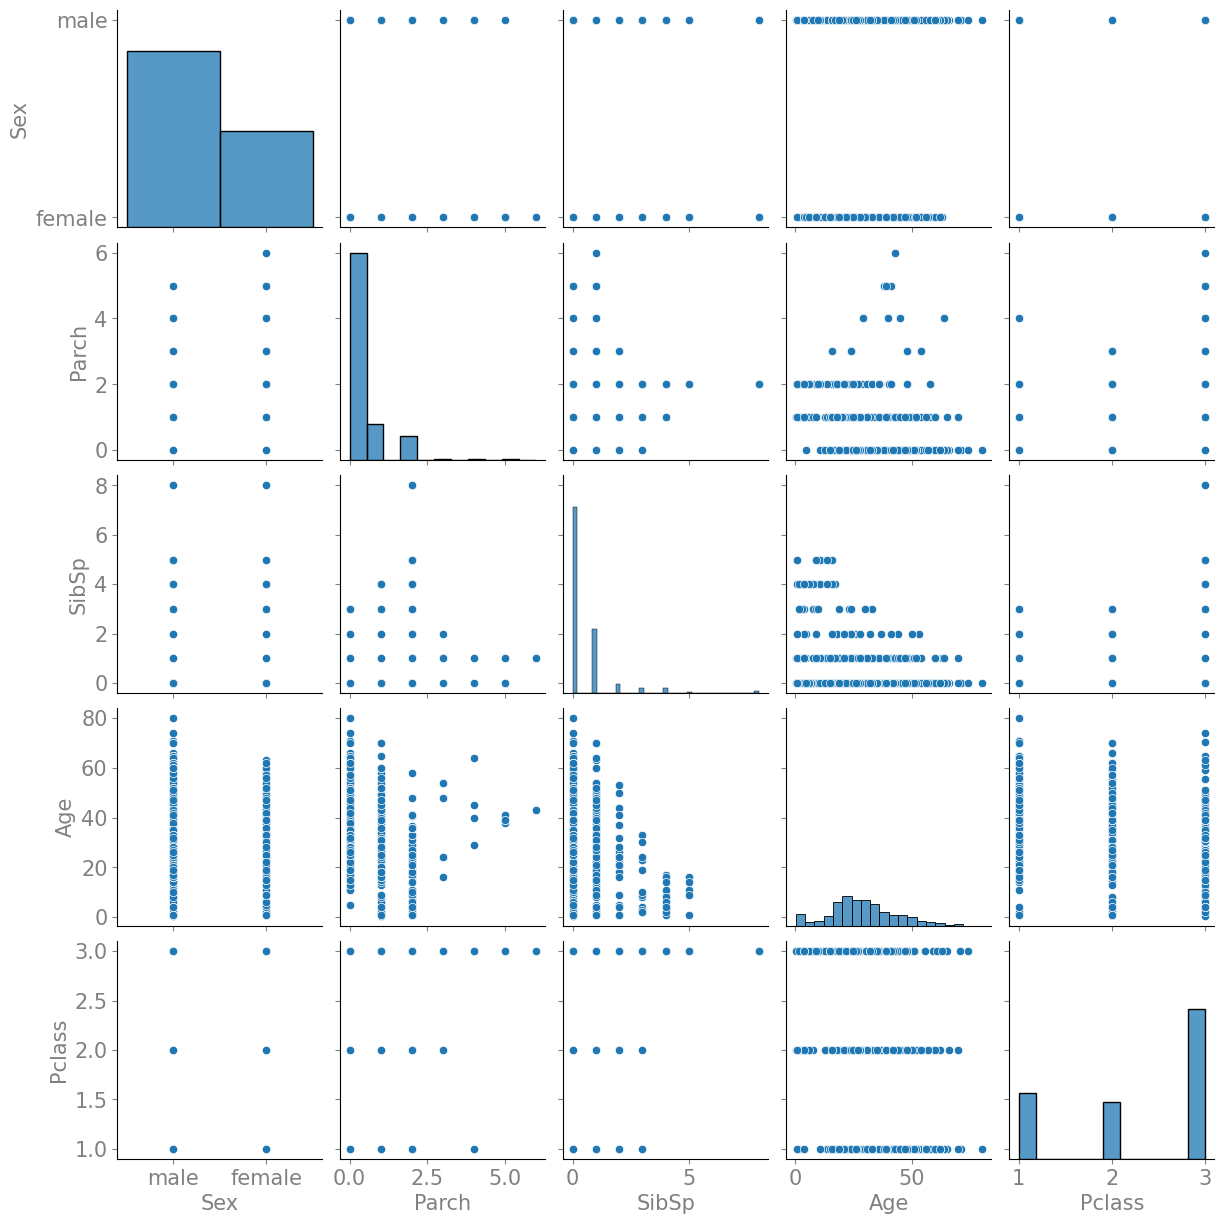

In [17]:
# Convertendo infinitos para NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Matriz de dispersão
plt.figure(figsize=(30, 15))
sns.pairplot(df, x_vars=['Sex', 'Parch', 'SibSp', 'Age', 'Pclass'], y_vars=['Sex', 'Parch', 'SibSp', 'Age', 'Pclass'])

<Axes: >

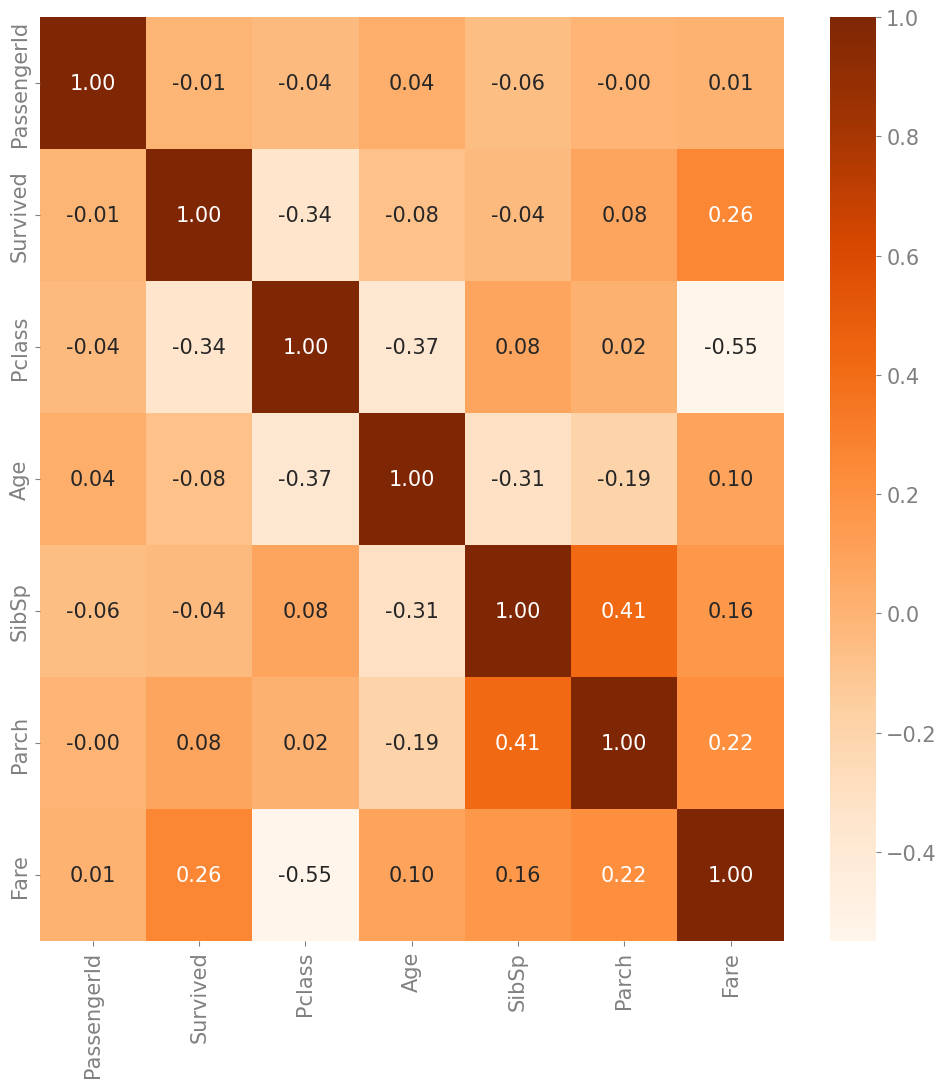

In [18]:
# matriz de correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Oranges', fmt='.2f')

Este gráfico é uma matriz de correlação, que mostra as correlações entre diferentes variáveis do conjunto de dados do naufrágio do Titanic. Cada célula colorida representa o coeficiente de correlação entre duas variáveis específicas. As cores mais avermelhadas indicam correlação positiva, enquanto as cores mais alaranjadas/amareladas indicam correlação negativa.
 
Algumas observações importantes:
 
1. A variável "PassengerId" tem correlação próxima de 1 consigo mesma, o que é esperado, já que é um identificador único.
 
2. As variáveis "Survived" e "Pclass" mostram uma correlação negativa moderada, sugerindo que passageiros de classes mais altas tiveram maior probabilidade de sobrevivência.
 
3. "Age" mostra correlações negativas fracas com "Survived" e "Pclass", indicando que pessoas mais jovens tinham uma leve vantagem de sobrevivência e tendiam a estar em classes mais altas.
 
4. "Sibsp" (número de irmãos/cônjuges a bordo) tem uma correlação positiva fraca com "Parch" (número de pais/filhos a bordo), sugerindo que famílias maiores viajavam juntas.
 
5. "Fare" tem uma correlação positiva moderada com "Pclass", o que faz sentido, já que passageiros de classes mais altas pagavam tarifas mais altas.
 
Em resumo, este gráfico de correlações pode fornecer insights iniciais sobre os relacionamentos entre as variáveis do conjunto de dados do Titanic e orientar uma análise mais aprofundada.